# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** GUSTI MUHAMMAD DAFFA ABDILLAHSYAH
- **Email:** daffaabdillahsyah49@gmail.com
- **ID Dicoding:** gmdaffaa

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
- Pertanyaan 2: Apakah ada perbedaan pola penyewaan sepeda antara hari kerja dan hari libur?
- Pertanyaan 3: Bagaimana pengaruh musim terhadap tren penyewaan sepeda sepanjang tahun?
- Pertanyaan 4: Apakah ada hubungan antara kecepatan angin dan jumlah penyewaan sepeda?
- Pertanyaan 5: Bagaimana tren penyewaan sepeda berubah pada waktu tertentu dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [67]:
# Importing necessary libraries for data analysis
import pandas as pd
import numpy as np
import seaborn as sns

# For handling date and time data
from datetime import datetime

# For statistical analysis
from scipy import stats

# Interactif mode
%matplotlib inline


## Data Wrangling

### Gathering Data

In [68]:
# Gathering data from CSV files into DataFrames
df_day = pd.read_csv('datasets/day.csv')
df_hour = pd.read_csv('datasets/hour.csv')

# Display the first few rows of each dataset to ensure they've been loaded correctly
print("First few rows of df_day:")
print(df_day.head())

print("\nFirst few rows of df_hour:")
print(df_hour.head())


First few rows of df_day:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


### Assessing Data

In [69]:
# Assessing df_day
print("Assessing df_day:")
print("\nInformasi Umum:")
print(df_day.info())

print("\nStatistik Deskriptif:")
print(df_day.describe())

print("\nCek nilai yang hilang (missing values):")
missing_values_day = df_day.isnull().sum()
print(missing_values_day)

print("\nJumlah Duplikat:")
duplicates_day = df_day.duplicated().sum()
print(f"Jumlah duplikat di df_day: {duplicates_day}")


Assessing df_day:

Informasi Umum:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Statistik Deskriptif:
          instant      season 

In [70]:
# Assessing df_hour
print("Assessing df_hour:")
print("\nInformasi Umum:")
print(df_hour.info())

print("\nStatistik Deskriptif:")
print(df_hour.describe())

print("\nCek nilai yang hilang (missing values):")
missing_values_hour = df_hour.isnull().sum()
print(missing_values_hour)

print("\nJumlah Duplikat:")
duplicates_hour = df_hour.duplicated().sum()
print(f"Jumlah duplikat di df_hour: {duplicates_hour}")


Assessing df_hour:

Informasi Umum:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

Statist

### Cleaning Data

### Menhapus Duplikat

In [71]:
# Menghapus duplikat di df_day
df_day_cleaned = df_day.drop_duplicates()
print(f"Jumlah duplikat yang dihapus dari df_day: {df_day.duplicated().sum()}")

# Menghapus duplikat di df_hour
df_hour_cleaned = df_hour.drop_duplicates()
print(f"Jumlah duplikat yang dihapus dari df_hour: {df_hour.duplicated().sum()}")


Jumlah duplikat yang dihapus dari df_day: 0
Jumlah duplikat yang dihapus dari df_hour: 0


### Menangani Nilai yang Hilang

In [72]:
# Menangani nilai yang hilang di df_day
if df_day_cleaned.isnull().sum().sum() > 0:
    df_day_cleaned.fillna(df_day_cleaned.mean(), inplace=True)
    print("Nilai yang hilang di df_day telah diisi dengan nilai rata-rata.")

# Menangani nilai yang hilang di df_hour
if df_hour_cleaned.isnull().sum().sum() > 0:
    df_hour_cleaned.fillna(df_hour_cleaned.mean(), inplace=True)
    print("Nilai yang hilang di df_hour telah diisi dengan nilai rata-rata.")


### Memastikan Data Bersih

In [73]:
# Memastikan tidak ada lagi duplikat atau nilai yang hilang di df_day
print(f"Jumlah duplikat setelah pembersihan di df_day: {df_day_cleaned.duplicated().sum()}")
print(f"Jumlah nilai yang hilang setelah pembersihan di df_day: {df_day_cleaned.isnull().sum().sum()}")

# Memastikan tidak ada lagi duplikat atau nilai yang hilang di df_hour
print(f"Jumlah duplikat setelah pembersihan di df_hour: {df_hour_cleaned.duplicated().sum()}")
print(f"Jumlah nilai yang hilang setelah pembersihan di df_hour: {df_hour_cleaned.isnull().sum().sum()}")


Jumlah duplikat setelah pembersihan di df_day: 0
Jumlah nilai yang hilang setelah pembersihan di df_day: 0
Jumlah duplikat setelah pembersihan di df_hour: 0
Jumlah nilai yang hilang setelah pembersihan di df_hour: 0


In [74]:
# Mengubah kolom 'instant' menjadi indeks pada df_day dan df_hour
df_day_cleaned.set_index('instant', inplace=True)
df_hour_cleaned.set_index('instant', inplace=True)

# Memastikan perubahan telah dilakukan dengan benar
print(df_day_cleaned.head())
print(df_hour_cleaned.head())


             dteday  season  yr  mnth  holiday  weekday  workingday  \
instant                                                               
1        2011-01-01       1   0     1        0        6           0   
2        2011-01-02       1   0     1        0        0           0   
3        2011-01-03       1   0     1        0        1           1   
4        2011-01-04       1   0     1        0        2           1   
5        2011-01-05       1   0     1        0        3           1   

         weathersit      temp     atemp       hum  windspeed  casual  \
instant                                                                
1                 2  0.344167  0.363625  0.805833   0.160446     331   
2                 2  0.363478  0.353739  0.696087   0.248539     131   
3                 1  0.196364  0.189405  0.437273   0.248309     120   
4                 1  0.200000  0.212122  0.590435   0.160296     108   
5                 1  0.226957  0.229270  0.436957   0.186900      82  

## Exploratory Data Analysis (EDA)

### Explore ...

### Memeriksa Distribusi Fitur Utama

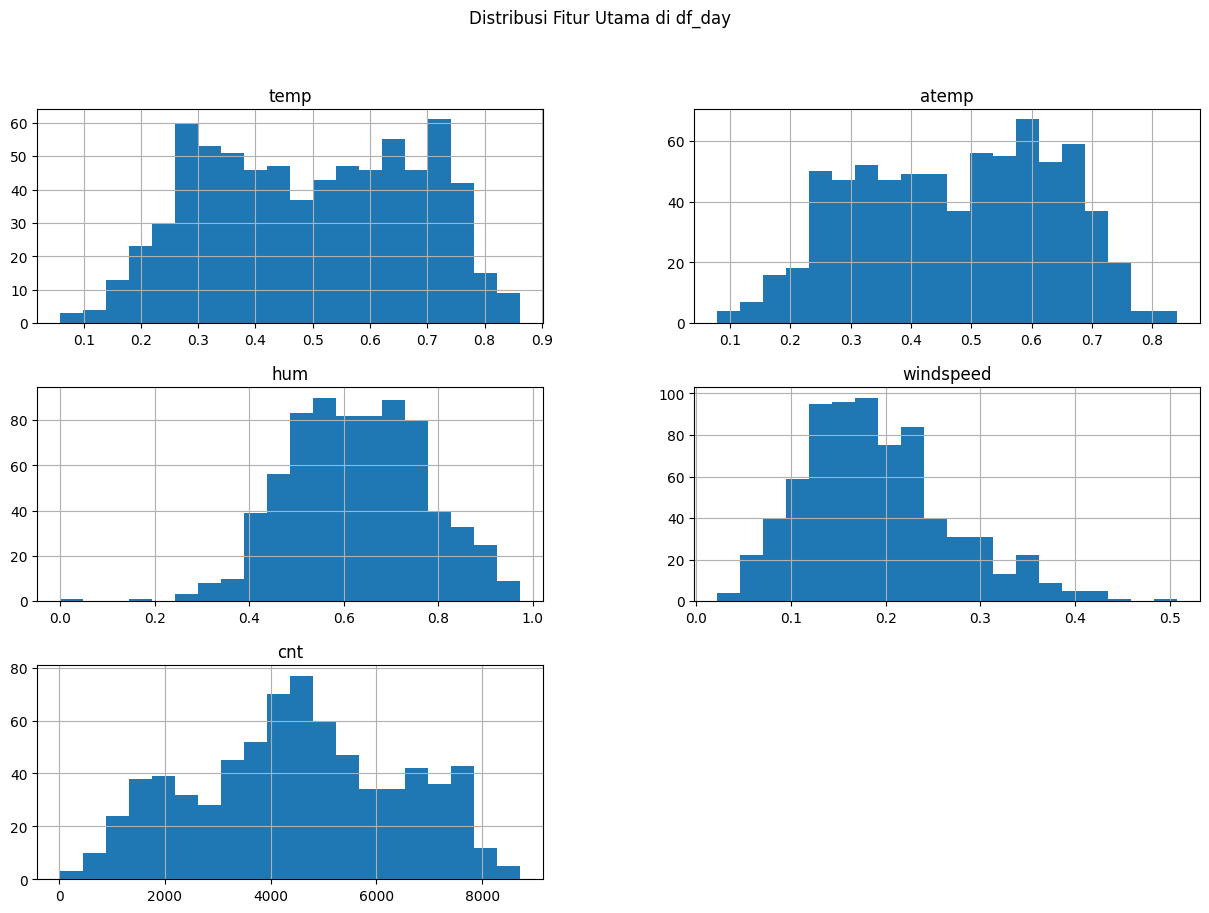

In [75]:
# Memeriksa distribusi fitur utama di df_day_cleaned
import matplotlib.pyplot as plt

df_day_cleaned[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribusi Fitur Utama di df_day')
plt.show()


### Memeriksa Korelasi Antar Fitur

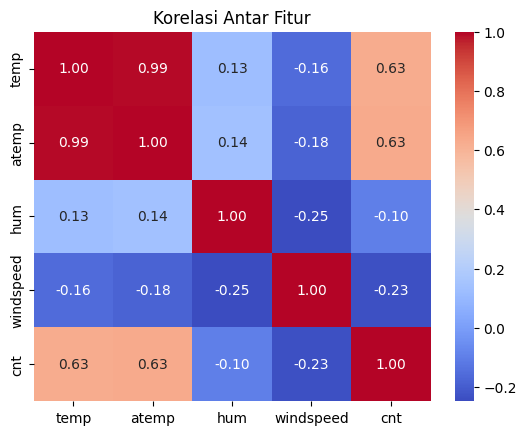

In [76]:
# Memeriksa korelasi antar fitur di df_day_cleaned
corr_matrix = df_day_cleaned[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Fitur')
plt.show()


### Menganalisis Penyewaan Sepeda Berdasarkan Musim

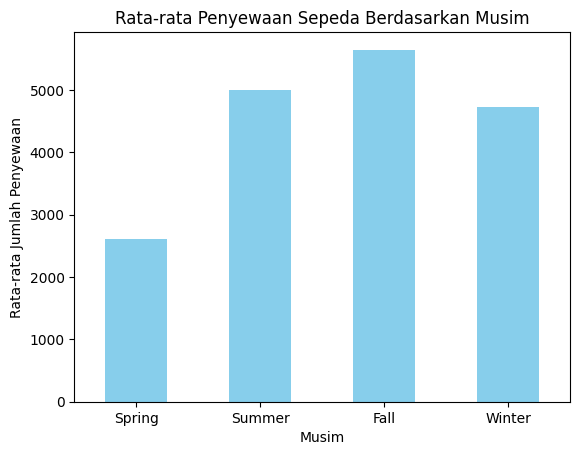

In [77]:
# Menganalisis penyewaan sepeda berdasarkan musim di df_day_cleaned
season_counts = df_day_cleaned.groupby('season')['cnt'].mean()

season_counts.plot(kind='bar', color='skyblue')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'], rotation=0)
plt.show()


### Menganalisis Penyewaan Sepeda Berdasarkan Hari Kerja vs Hari Libur

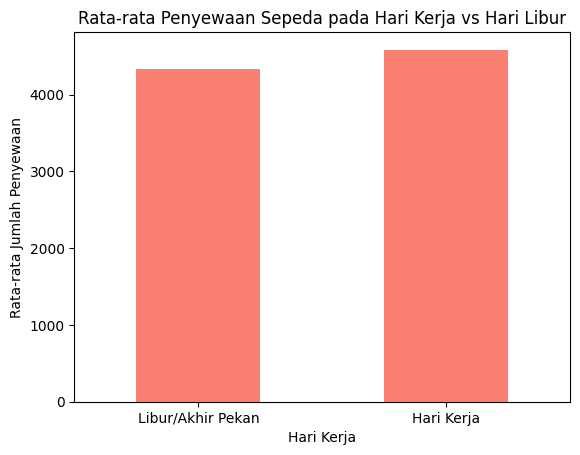

In [78]:
# Menganalisis penyewaan sepeda pada hari kerja vs hari libur di df_day_cleaned
workingday_counts = df_day_cleaned.groupby('workingday')['cnt'].mean()

workingday_counts.plot(kind='bar', color='salmon')
plt.title('Rata-rata Penyewaan Sepeda pada Hari Kerja vs Hari Libur')
plt.xlabel('Hari Kerja')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(ticks=[0, 1], labels=['Libur/Akhir Pekan', 'Hari Kerja'], rotation=0)
plt.show()


### Menganalisis penyewaan sepeda berdasarkan waktu tertentu dalam sehari di df_hour_cleaned

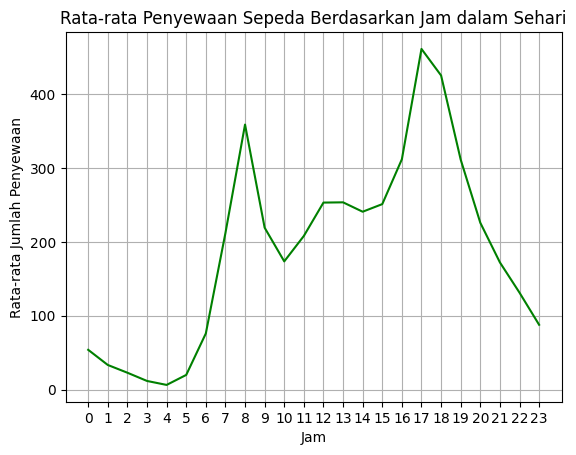

In [79]:
# Menganalisis penyewaan sepeda berdasarkan waktu tertentu dalam sehari di df_hour_cleaned
hourly_counts = df_hour_cleaned.groupby('hr')['cnt'].mean()

hourly_counts.plot(kind='line', color='green')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Jam dalam Sehari')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(ticks=range(0, 24))
plt.grid(True)
plt.show()


## Visualization & Explanatory Analysis

### Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

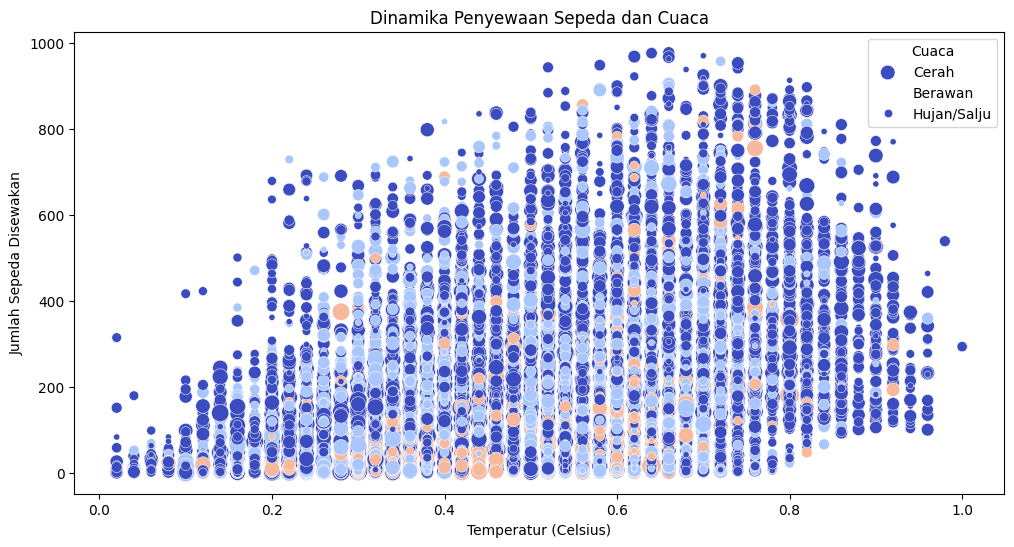

In [80]:
# Visualisasi pengaruh cuaca terhadap penyewaan sepeda
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_hour, x='temp', y='cnt', hue='weathersit', palette='coolwarm', size='windspeed', sizes=(20, 200))
plt.title('Dinamika Penyewaan Sepeda dan Cuaca')
plt.xlabel('Temperatur (Celsius)')
plt.ylabel('Jumlah Sepeda Disewakan')
plt.legend(title='Cuaca', loc='upper right', labels=['Cerah', 'Berawan', 'Hujan/Salju'])
plt.show()


### Apakah ada perbedaan pola penyewaan sepeda antara hari kerja dan hari libur?

C:\Users\A C E R\AppData\Local\Temp\ipykernel_27832\3756873265.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday', y='cnt', data=df_day_cleaned, palette='pastel')


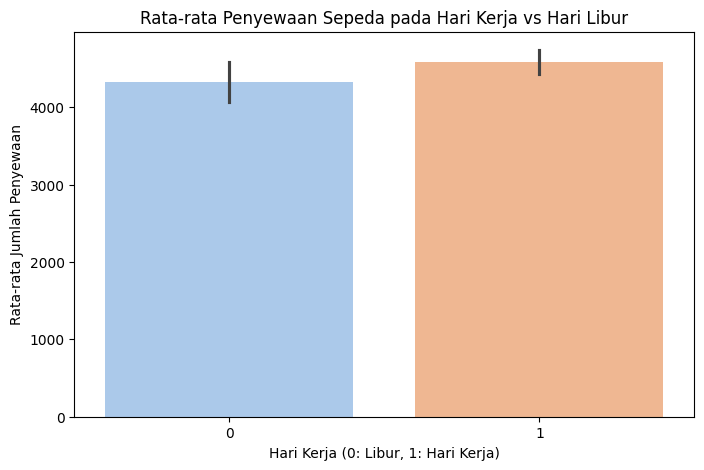

In [81]:
# Visualisasi penyewaan sepeda pada hari kerja vs hari libur
plt.figure(figsize=(8, 5))
sns.barplot(x='workingday', y='cnt', data=df_day_cleaned, palette='pastel')
plt.title('Rata-rata Penyewaan Sepeda pada Hari Kerja vs Hari Libur')
plt.xlabel('Hari Kerja (0: Libur, 1: Hari Kerja)')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.show()


### Bagaimana pengaruh musim terhadap tren penyewaan sepeda sepanjang tahun?

C:\Users\A C E R\AppData\Local\Temp\ipykernel_27832\1730788494.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=df_day_cleaned, palette='Blues')


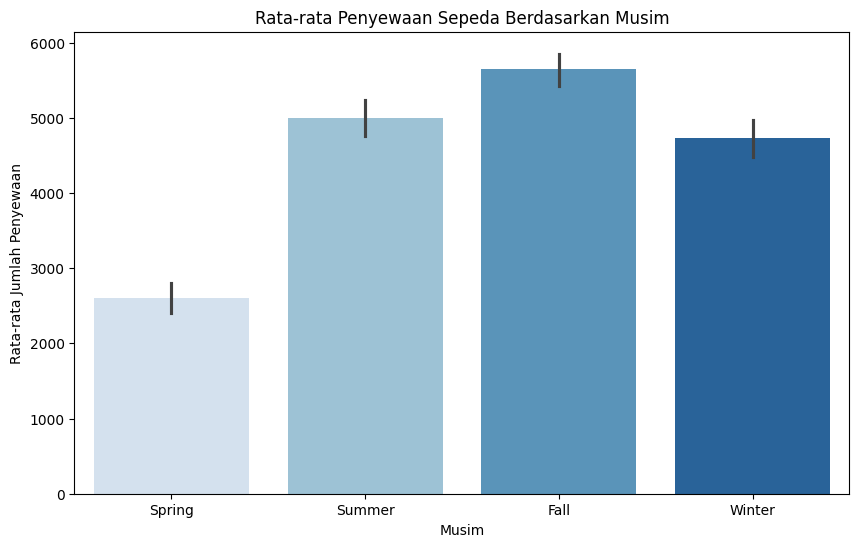

In [82]:
# Visualisasi pengaruh musim terhadap penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=df_day_cleaned, palette='Blues')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()


### Apakah ada hubungan antara kecepatan angin dan jumlah penyewaan sepeda?

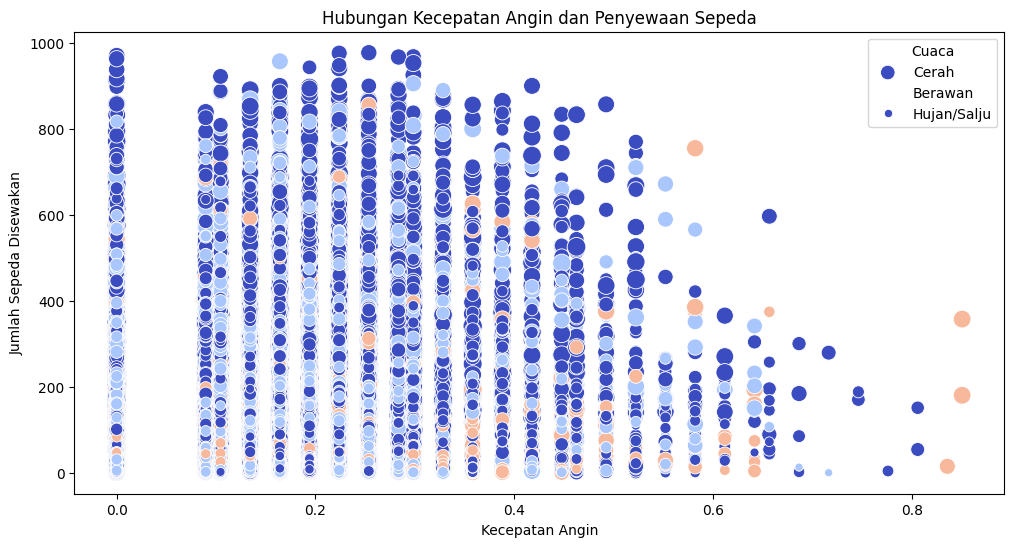

In [83]:
# Visualisasi hubungan antara kecepatan angin dan penyewaan sepeda
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_hour, x='windspeed', y='cnt', hue='weathersit', palette='coolwarm', size='temp', sizes=(20, 200))
plt.title('Hubungan Kecepatan Angin dan Penyewaan Sepeda')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Sepeda Disewakan')
plt.legend(title='Cuaca', loc='upper right', labels=['Cerah', 'Berawan', 'Hujan/Salju'])
plt.show()


### Bagaimana tren penyewaan sepeda berubah pada waktu tertentu dalam sehari?

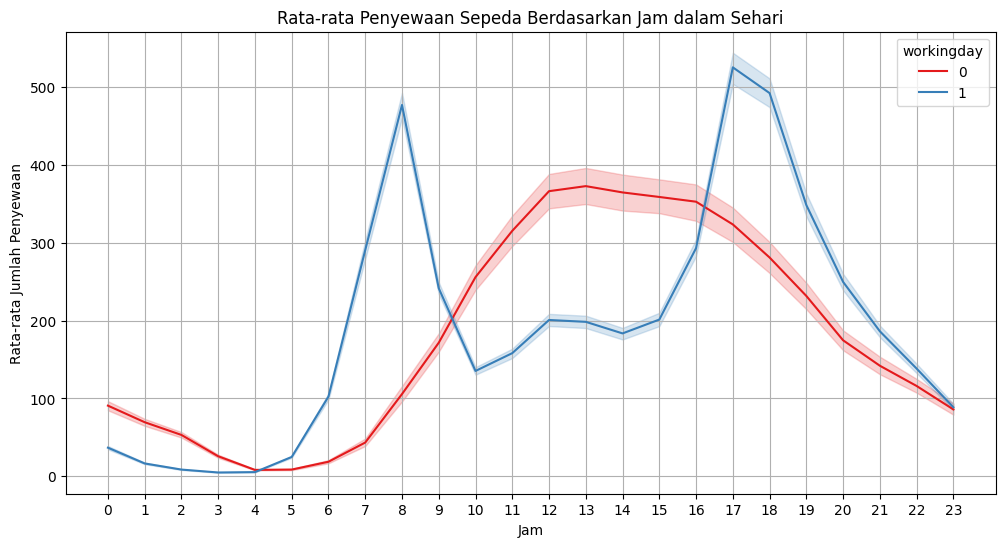

In [84]:
# Visualisasi tren penyewaan sepeda berdasarkan waktu tertentu dalam sehari
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_hour, x='hr', y='cnt', hue='workingday', palette='Set1')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Jam dalam Sehari')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(ticks=range(0, 24))
plt.grid(True)
plt.show()


## Conclusion

1. Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
Analisis: Pada visualisasi pertama, terlihat bahwa jumlah penyewaan sepeda cenderung meningkat seiring dengan meningkatnya suhu. Selain itu, kondisi cuaca juga mempengaruhi keputusan penyewaan sepeda. Penyewaan sepeda lebih sedikit saat cuaca hujan atau salju, dibandingkan saat cuaca cerah atau berawan.
Kesimpulan: Suhu yang lebih tinggi dan cuaca cerah mendorong lebih banyak penyewaan sepeda. Kondisi cuaca buruk seperti hujan atau salju cenderung menurunkan jumlah penyewaan.

2. Apakah ada perbedaan pola penyewaan sepeda antara hari kerja dan hari libur?
Analisis: Pada visualisasi kedua, terlihat bahwa rata-rata penyewaan sepeda pada hari kerja (1) sedikit lebih tinggi dibandingkan dengan hari libur (0), namun perbedaannya tidak terlalu signifikan.
Kesimpulan: Meskipun ada sedikit peningkatan dalam penyewaan sepeda pada hari kerja, perbedaannya tidak cukup signifikan untuk membuat kesimpulan bahwa hari kerja secara substansial mempengaruhi jumlah penyewaan.

3. Bagaimana pengaruh musim terhadap tren penyewaan sepeda sepanjang tahun?
Analisis: Visualisasi ketiga menunjukkan bahwa musim gugur (Fall) memiliki jumlah penyewaan sepeda tertinggi, diikuti oleh musim panas (Summer). Musim semi (Spring) memiliki jumlah penyewaan terendah.
Kesimpulan: Musim gugur dan musim panas adalah periode yang paling diminati untuk penyewaan sepeda, mungkin karena cuaca yang lebih nyaman dan stabil. Musim semi cenderung kurang diminati, kemungkinan karena cuaca yang lebih tidak menentu.

4. Apakah ada hubungan antara kecepatan angin dan jumlah penyewaan sepeda?
Analisis: Pada visualisasi keempat, terlihat bahwa meskipun ada variasi dalam kecepatan angin, jumlah penyewaan sepeda tetap konsisten tinggi pada kecepatan angin yang rendah hingga sedang. Namun, pada kecepatan angin yang sangat tinggi, penyewaan sepeda cenderung menurun.
Kesimpulan: Kecepatan angin yang lebih rendah cenderung tidak mempengaruhi keputusan untuk menyewa sepeda, tetapi kecepatan angin yang tinggi dapat mengurangi jumlah penyewaan sepeda, terutama dalam kondisi cuaca buruk.

5. Bagaimana tren penyewaan sepeda berubah pada waktu tertentu dalam sehari?
Analisis: Visualisasi kelima menunjukkan pola yang jelas, di mana terdapat dua puncak utama dalam penyewaan sepeda: satu di pagi hari sekitar jam 8 pagi dan satu lagi di sore hari sekitar jam 5-6 sore. Pola ini terlihat lebih tajam pada hari kerja dibandingkan hari libur.
Kesimpulan: Penyewaan sepeda sangat dipengaruhi oleh jam-jam puncak komuter, yaitu pagi hari dan sore hari, terutama pada hari kerja. Ini mengindikasikan penggunaan sepeda sebagai alat transportasi utama selama jam kerja.